<a href="https://colab.research.google.com/github/WinnieAnyoso/Supervised_and-_unsupervised_ML_R/blob/master/PART_1_Dimensionality_Reduction_%26_Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
# Load dataset
super <- read.csv("Supermarket_Dataset_1 - Sales Data.csv")
head(super)

,Invoice.ID,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Date,Time,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total
,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,750-67-8428,A,Member,Female,Health and beauty,74.69,7,26.1415,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,548.9715
2,226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,3.8200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,80.2200
3,631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,340.5255
4,123-19-1176,A,Member,Male,Health and beauty,58.22,8,23.2880,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,489.0480
5,373-73-7910,A,Normal,Male,Sports and travel,86.31,7,30.2085,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,634.3785
6,699-14-3026,C,Normal,Male,Electronic accessories,85.39,7,29.8865,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1,627.6165


#2.Data exploration

In [72]:
str(super)

'data.frame':	1000 obs. of  16 variables:
 $ Invoice.ID             : Factor w/ 1000 levels "101-17-6199",..: 815 143 654 19 340 734 316 265 703 727 ...
 $ Branch                 : Factor w/ 3 levels "A","B","C": 1 3 1 1 1 3 1 3 1 2 ...
 $ Customer.type          : Factor w/ 2 levels "Member","Normal": 1 2 2 1 2 2 1 2 1 1 ...
 $ Gender                 : Factor w/ 2 levels "Female","Male": 1 1 2 2 2 2 1 1 1 1 ...
 $ Product.line           : Factor w/ 6 levels "Electronic accessories",..: 4 1 5 4 6 1 1 5 4 3 ...
 $ Unit.price             : num  74.7 15.3 46.3 58.2 86.3 ...
 $ Quantity               : int  7 5 7 8 7 7 6 10 2 3 ...
 $ Tax                    : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Date                   : Factor w/ 89 levels "1/1/2019","1/10/2019",..: 27 88 82 20 58 77 49 48 2 44 ...
 $ Time                   : Factor w/ 506 levels "10:00","10:01",..: 147 24 156 486 30 394 215 78 342 160 ...
 $ Payment                : Factor w/ 3 levels "Cash","Credit card",..: 3 1 2 3 3

In [73]:
# DImension of the dataset
dim(super)


[1] 1000   16

In [74]:
# Summary of the dataset
summary(super)

       Invoice.ID  Branch  Customer.type    Gender   
 101-17-6199:  1   A:340   Member:501    Female:501  
 101-81-4070:  1   B:332   Normal:499    Male  :499  
 102-06-2002:  1   C:328                             
 102-77-2261:  1                                     
 105-10-6182:  1                                     
 105-31-1824:  1                                     
 (Other)    :994                                     
                 Product.line   Unit.price       Quantity          Tax         
 Electronic accessories:170   Min.   :10.08   Min.   : 1.00   Min.   : 0.5085  
 Fashion accessories   :178   1st Qu.:32.88   1st Qu.: 3.00   1st Qu.: 5.9249  
 Food and beverages    :174   Median :55.23   Median : 5.00   Median :12.0880  
 Health and beauty     :152   Mean   :55.67   Mean   : 5.51   Mean   :15.3794  
 Home and lifestyle    :160   3rd Qu.:77.94   3rd Qu.: 8.00   3rd Qu.:22.4453  
 Sports and travel     :166   Max.   :99.96   Max.   :10.00   Max.   :49.6500  
        

#3.Data cleaning 

In [75]:
# Missing Values

# Total missing values in each column 
# by using the function colSums()

colSums(is.na(super))

Invoice.ID                  Branch           Customer.type 
                      0                       0                       0 
                 Gender            Product.line              Unit.price 
                      0                       0                       0 
               Quantity                     Tax                    Date 
                      0                       0                       0 
                   Time                 Payment                    cogs 
                      0                       0                       0 
gross.margin.percentage            gross.income                  Rating 
                      0                       0                       0 
                  Total 
                      0

In [76]:

# Duplicated Data

# duplicated rows in the dataset df 
# and assign to a variable duplicated_rows

duplicated_rows <- super[duplicated(super),]
head(duplicated_rows)

Invoice.ID,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Date,Time,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total
<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>


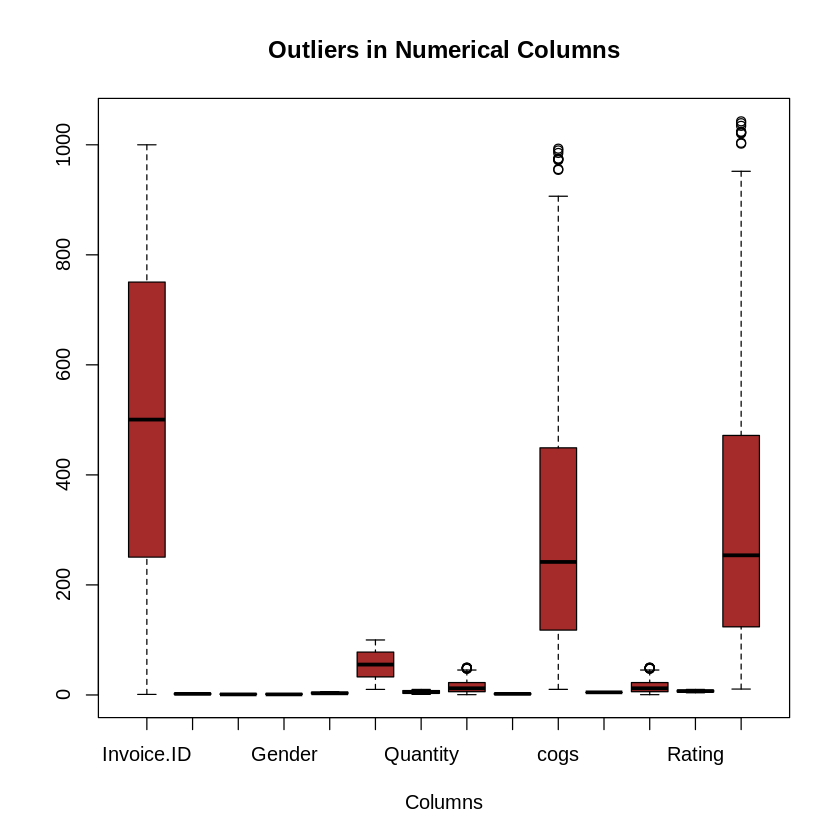

In [77]:
# Outliers

# Subset your data to numerical columns only
num <- super[, c(1,2,3,4,5,6,7,8,11,12,13,14,15,16)]
boxplot(num,
main = "Outliers in Numerical Columns",
xlab = "Columns",
col = "brown",
border = "black")

In [78]:
# Change datatypes to the correct ones:

# To Numeric datatype
g = c('Branch', 'Gender','Customer.type', 'Product.line', 'Payment')
for (i in g){
    super[,i] = as.numeric(super[,i])
}

In [79]:

# Converting invoice id to character string.
super$Invoice.ID = as.character(super$Invoice.ID)

In [80]:
# Converting date and time to string

#Combining the two columns and converting the data type to data_time
super$Date_Time =  strptime(paste(super$Date, super$Time), format="%m/%d/%Y %M:%S")

In [81]:
# Dropping the unecessary Date and Time columns.
super = super[,c(-9,-10)]
names(super)

[1] "Invoice.ID"              "Branch"                 
 [3] "Customer.type"           "Gender"                 
 [5] "Product.line"            "Unit.price"             
 [7] "Quantity"                "Tax"                    
 [9] "Payment"                 "cogs"                   
[11] "gross.margin.percentage" "gross.income"           
[13] "Rating"                  "Total"                  
[15] "Date_Time"

In [82]:
# Checking the data types again
str(super)

'data.frame':	1000 obs. of  15 variables:
 $ Invoice.ID             : chr  "750-67-8428" "226-31-3081" "631-41-3108" "123-19-1176" ...
 $ Branch                 : num  1 3 1 1 1 3 1 3 1 2 ...
 $ Customer.type          : num  1 2 2 1 2 2 1 2 1 1 ...
 $ Gender                 : num  1 1 2 2 2 2 1 1 1 1 ...
 $ Product.line           : num  4 1 5 4 6 1 1 5 4 3 ...
 $ Unit.price             : num  74.7 15.3 46.3 58.2 86.3 ...
 $ Quantity               : int  7 5 7 8 7 7 6 10 2 3 ...
 $ Tax                    : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Payment                : num  3 1 2 3 3 3 3 3 2 2 ...
 $ cogs                   : num  522.8 76.4 324.3 465.8 604.2 ...
 $ gross.margin.percentage: num  4.76 4.76 4.76 4.76 4.76 ...
 $ gross.income           : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Rating                 : num  9.1 9.6 7.4 8.4 5.3 4.1 5.8 8 7.2 5.9 ...
 $ Total                  : num  549 80.2 340.5 489 634.4 ...
 $ Date_Time              : POSIXlt, format: "2019-01-05 00:13:

In [83]:
install.packages("dplyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [84]:
# select numeric columns

# Checking for outliers in the numerical columns
# Importing the library dplyr

library(dplyr)
super_num <- select_if(super, is.numeric)

In [85]:
install.packages("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Warning message in cor(data.num):
“the standard deviation is zero”


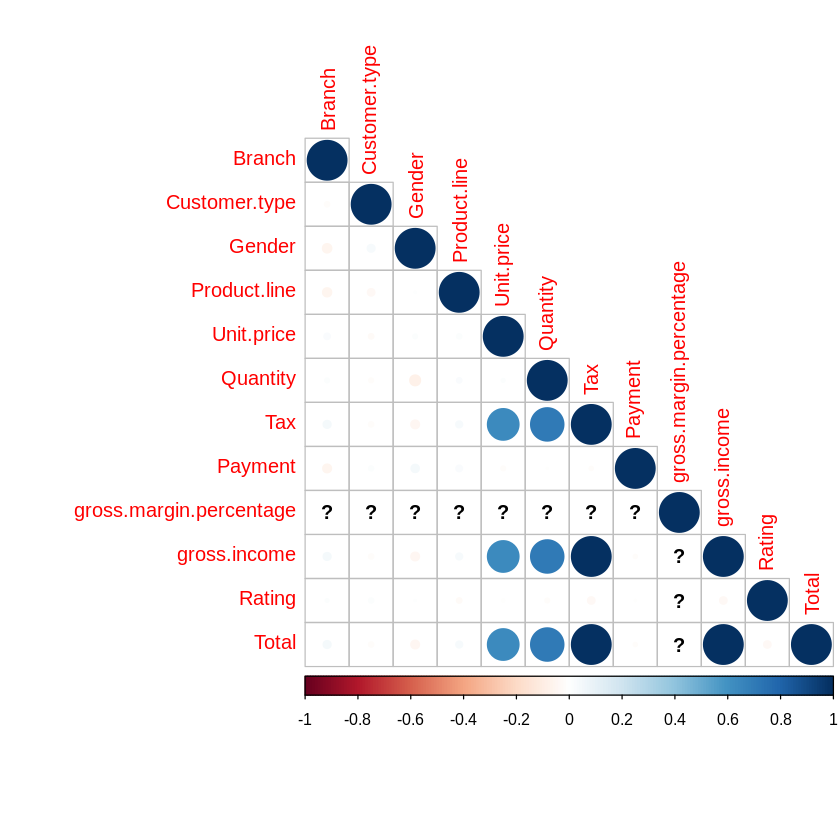

In [70]:
# Correlation Matrix
data.num <- super[, sapply(super, is.numeric)]
data.cor = cor(data.num)

library(corrplot)
corrplot(data.cor, type = 'lower')

#Principal Component Analysis

- PCA only applied to numerical columns 


In [87]:
names(super_num)

[1] "Branch"        "Customer.type" "Gender"        "Unit.price"   
 [5] "Quantity"      "Tax"           "Payment"       "cogs"         
 [9] "gross.income"  "Rating"        "Total"

In [86]:
super_num = super_num[,c(-4, -10)]
names(super_num)

[1] "Branch"        "Customer.type" "Gender"        "Unit.price"   
 [5] "Quantity"      "Tax"           "Payment"       "cogs"         
 [9] "gross.income"  "Rating"        "Total"

In [88]:
# We will use the numrical data and drop the categorical.
# Since algo cannot rescale a constant/zero column to unit variance, we drop gross.margin. production
# It only has one value 4.761905

# We then pass data.num to the prcomp(). 
# We set two arguments, center and scale to be TRUE then preview our object with summary

super_num.pca <- prcomp(super_num[, c(-5)], center = TRUE, scale. = T)
summary(super_num.pca)

Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     2.1144 1.0556 1.0085 0.98601 0.97719 0.96994 0.72791
Proportion of Variance 0.4471 0.1114 0.1017 0.09722 0.09549 0.09408 0.05298
Cumulative Proportion  0.4471 0.5585 0.6602 0.75745 0.85294 0.94702 1.00000
                             PC8       PC9      PC10
Standard deviation     7.802e-16 2.274e-16 1.299e-16
Proportion of Variance 0.000e+00 0.000e+00 0.000e+00
Cumulative Proportion  1.000e+00 1.000e+00 1.000e+00

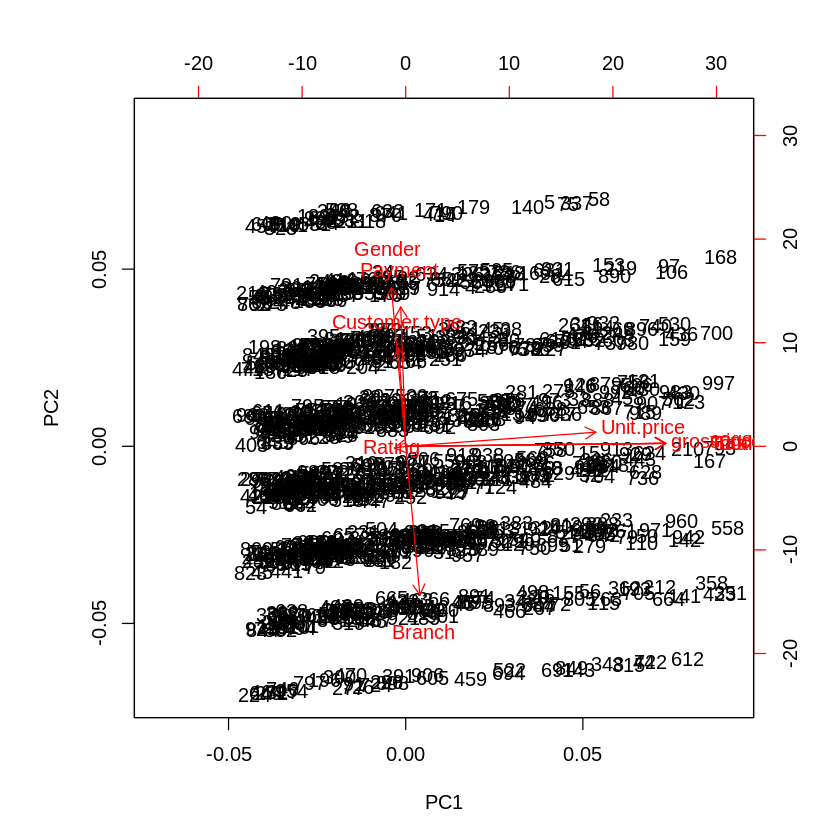

In [89]:
biplot(super_num.pca)
